In [1]:
# Common imports
import numpy as np
import pandas as pd


# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# to make this notebook's output identical at every run
np.random.seed(42)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
import os
os.getcwd()


'/Users/dustin.ellis/Desktop/Desktop/Drexel University Data Science/Classes/DSCI_591-Capstone_1/Exploratory Data Analysis'

In [5]:
import os
files = [f for f in os.listdir('.') if os.path.isfile(f)]
for f in files:
    print(files)

['.DS_Store', 'Exploratory Data Analysis DSCI 591.ipynb', 'amazon_reviews_us_Mobile_Electronics_v1_00.tsv', 'amazon_reviews_us_Electronics_v1_00.tsv']
['.DS_Store', 'Exploratory Data Analysis DSCI 591.ipynb', 'amazon_reviews_us_Mobile_Electronics_v1_00.tsv', 'amazon_reviews_us_Electronics_v1_00.tsv']
['.DS_Store', 'Exploratory Data Analysis DSCI 591.ipynb', 'amazon_reviews_us_Mobile_Electronics_v1_00.tsv', 'amazon_reviews_us_Electronics_v1_00.tsv']
['.DS_Store', 'Exploratory Data Analysis DSCI 591.ipynb', 'amazon_reviews_us_Mobile_Electronics_v1_00.tsv', 'amazon_reviews_us_Electronics_v1_00.tsv']


In [70]:
#Get the data

el = pd.read_csv("/Users/dustin.ellis/Desktop/Desktop/Drexel University Data Science/Classes/DSCI_591-Capstone_1/Exploratory Data Analysis/amazon_reviews_us_Electronics_v1_00.tsv",sep="\t", error_bad_lines = False)
el.head()

b'Skipping line 9076: expected 15 fields, saw 22\nSkipping line 19256: expected 15 fields, saw 22\nSkipping line 24313: expected 15 fields, saw 22\nSkipping line 47211: expected 15 fields, saw 22\nSkipping line 54295: expected 15 fields, saw 22\nSkipping line 56641: expected 15 fields, saw 22\nSkipping line 63067: expected 15 fields, saw 22\n'
b'Skipping line 93796: expected 15 fields, saw 22\n'
b'Skipping line 132806: expected 15 fields, saw 22\nSkipping line 164631: expected 15 fields, saw 22\nSkipping line 167019: expected 15 fields, saw 22\nSkipping line 167212: expected 15 fields, saw 22\n'
b'Skipping line 198103: expected 15 fields, saw 22\nSkipping line 199191: expected 15 fields, saw 22\nSkipping line 202841: expected 15 fields, saw 22\nSkipping line 218228: expected 15 fields, saw 22\nSkipping line 235900: expected 15 fields, saw 22\n'
b'Skipping line 277761: expected 15 fields, saw 22\nSkipping line 304582: expected 15 fields, saw 22\nSkipping line 312029: expected 15 fields,

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,41409413,R2MTG1GCZLR2DK,B00428R89M,112201306,yoomall 5M Antenna WIFI RP-SMA Female to Male ...,Electronics,5,0,0,N,Y,Five Stars,As described.,2015-08-31
1,US,49668221,R2HBOEM8LE9928,B000068O48,734576678,"Hosa GPM-103 3.5mm TRS to 1/4"" TRS Adaptor",Electronics,5,0,0,N,Y,It works as advertising.,It works as advertising.,2015-08-31
2,US,12338275,R1P4RW1R9FDPEE,B000GGKOG8,614448099,Channel Master Titan 2 Antenna Preamplifier,Electronics,5,1,1,N,Y,Five Stars,Works pissa,2015-08-31
3,US,38487968,R1EBPM82ENI67M,B000NU4OTA,72265257,LIMTECH Wall charger + USB Hotsync & Charging ...,Electronics,1,0,0,N,Y,One Star,Did not work at all.,2015-08-31
4,US,23732619,R372S58V6D11AT,B00JOQIO6S,308169188,Skullcandy Air Raid Portable Bluetooth Speaker,Electronics,5,1,1,N,Y,Overall pleased with the item,Works well. Bass is somewhat lacking but is pr...,2015-08-31


Examination 1: Helpful votes and total_votes appear to be most likley to have 0 values. We may want to drop these columns.

In [74]:
#get the information about the dataset
el.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3091024 entries, 0 to 3091023
Data columns (total 15 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   marketplace        object
 1   customer_id        int64 
 2   review_id          object
 3   product_id         object
 4   product_parent     int64 
 5   product_title      object
 6   product_category   object
 7   star_rating        int64 
 8   helpful_votes      int64 
 9   total_votes        int64 
 10  vine               object
 11  verified_purchase  object
 12  review_headline    object
 13  review_body        object
 14  review_date        object
dtypes: int64(5), object(10)
memory usage: 353.7+ MB


In [72]:
#get basic stats on numerical columns. Customer ID and product parent should be treated as objects. 
el.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes
count,3.091024e+06,3.091024e+06,3.091024e+06,3.091024e+06,3.091024e+06
mean,2.879196e+07,5.102057e+08,4.035415e+00,1.860874e+00,2.372440e+00
std,1.542984e+07,2.868327e+08,1.387460e+00,2.133715e+01,2.249700e+01
min,1.000500e+04,6.478000e+03,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.503881e+07,2.623618e+08,3.000000e+00,0.000000e+00,0.000000e+00
50%,2.806679e+07,5.085523e+08,5.000000e+00,0.000000e+00,0.000000e+00
75%,4.328128e+07,7.632433e+08,5.000000e+00,1.000000e+00,1.000000e+00
max,5.309658e+07,9.999982e+08,5.000000e+00,1.278600e+04,1.294400e+04


In [75]:
#get counts of star ratings to get a sense of how many reviews there are
el['star_rating'].value_counts()

5    1779371
4     536417
1     357817
3     238387
2     179032
Name: star_rating, dtype: int64

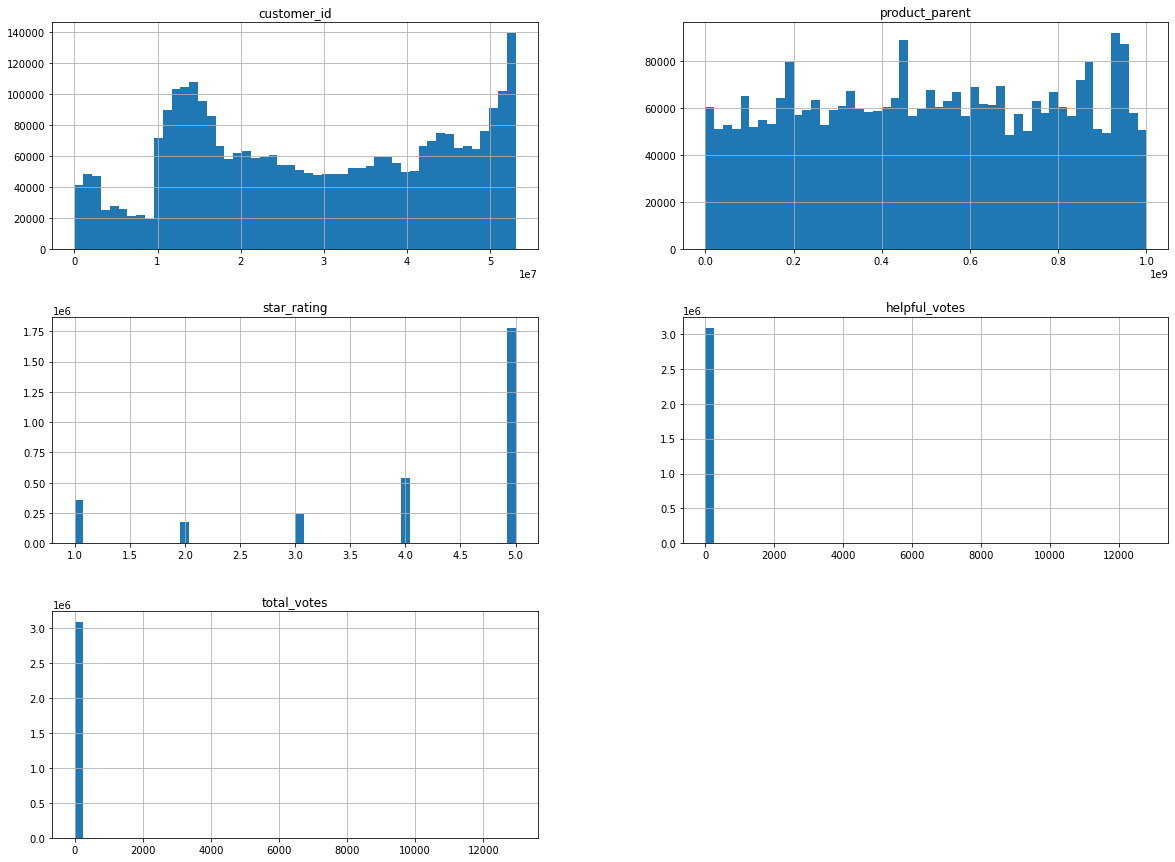

In [76]:
# plot a histogram for each numerical attribute to get a feel of data
%matplotlib inline
import matplotlib.pyplot as plt
el.hist(bins=50, figsize=(20,15))
plt.show()

Customer ID and product parent should be transformed into categorical variables, since they do not need to be computed and refer to a unique ID. Getting rid of helpful votes and total votes seems to be a good idea as there isn't really any helpful information and it appears people tend to just leave a star rating or comment in regards to reviewing products. 

In [77]:
#drop helpful_votes and total_votes columns, because they are useless:
el = el.drop(['helpful_votes', 'total_votes', 'vine'], axis = 1)

In [78]:
#extract year from review date column

el['year'] = pd.DatetimeIndex(el['review_date']).year
el.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,verified_purchase,review_headline,review_body,review_date,year
0,US,41409413,R2MTG1GCZLR2DK,B00428R89M,112201306,yoomall 5M Antenna WIFI RP-SMA Female to Male ...,Electronics,5,Y,Five Stars,As described.,2015-08-31,2015.0
1,US,49668221,R2HBOEM8LE9928,B000068O48,734576678,"Hosa GPM-103 3.5mm TRS to 1/4"" TRS Adaptor",Electronics,5,Y,It works as advertising.,It works as advertising.,2015-08-31,2015.0
2,US,12338275,R1P4RW1R9FDPEE,B000GGKOG8,614448099,Channel Master Titan 2 Antenna Preamplifier,Electronics,5,Y,Five Stars,Works pissa,2015-08-31,2015.0
3,US,38487968,R1EBPM82ENI67M,B000NU4OTA,72265257,LIMTECH Wall charger + USB Hotsync & Charging ...,Electronics,1,Y,One Star,Did not work at all.,2015-08-31,2015.0
4,US,23732619,R372S58V6D11AT,B00JOQIO6S,308169188,Skullcandy Air Raid Portable Bluetooth Speaker,Electronics,5,Y,Overall pleased with the item,Works well. Bass is somewhat lacking but is pr...,2015-08-31,2015.0


In [79]:
#drop review date column since year is extracted

el = el.drop(['review_date'], axis = 1)


In [80]:
#count the # of reviews per year

el['year'].value_counts(ascending = True)

1999.0       701
2000.0      4443
2001.0      5481
2002.0      7176
2003.0      9828
2004.0     12601
2005.0     20098
2006.0     29576
2007.0     61353
2008.0     71183
2009.0     91079
2010.0    123489
2011.0    187094
2012.0    268649
2013.0    556145
2015.0    809813
2014.0    832291
Name: year, dtype: int64

In [81]:
el['product_title'].value_counts(normalize = True)

Panasonic ErgoFit In-Ear Earbud Headphone                                                                                                                                    8.026477e-03
AmazonBasics High-Speed HDMI Cable - 6.5 Feet (2 Meters) Supports Ethernet, 3D, 4K and Audio Return                                                                          5.223842e-03
Mediabridge ULTRA Series HDMI Cable (3 Foot) - High-Speed Supports Ethernet, 3D and Audio Return [Newest Standard]                                                           5.069200e-03
Clip Plus 4 GB MP3 Player (Black)                                                                                                                                            3.808128e-03
High Speed HDMI Cable (1.5 Feet) With Ethernet - CL3 Certified - Supports 3D and Audio Return Channel, 1-Pack                                                                3.615311e-03
                                                                      

In [82]:
el['review_headline'].value_counts()

Five Stars                                                                 324568
Four Stars                                                                  68072
One Star                                                                    38825
Three Stars                                                                 26568
Two Stars                                                                   16206
                                                                            ...  
Wish I had perfect hearing in both ears so I could really apreciate ...         1
Good so long as they fit                                                        1
Small, easy to use and sounds great!!!                                          1
Great - Used as Rear Speakers                                                   1
Get a watch band accessory!                                                     1
Name: review_headline, Length: 1635684, dtype: int64

In [93]:
#examine DF
pd.options.display.max_rows
pd.options.display.max_columns
el

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,verified_purchase,review_headline,review_body,year
0,US,41409413,R2MTG1GCZLR2DK,B00428R89M,112201306,yoomall 5M Antenna WIFI RP-SMA Female to Male ...,Electronics,5,Y,Five Stars,As described.,2015.0
1,US,49668221,R2HBOEM8LE9928,B000068O48,734576678,"Hosa GPM-103 3.5mm TRS to 1/4"" TRS Adaptor",Electronics,5,Y,It works as advertising.,It works as advertising.,2015.0
2,US,12338275,R1P4RW1R9FDPEE,B000GGKOG8,614448099,Channel Master Titan 2 Antenna Preamplifier,Electronics,5,Y,Five Stars,Works pissa,2015.0
3,US,38487968,R1EBPM82ENI67M,B000NU4OTA,72265257,LIMTECH Wall charger + USB Hotsync & Charging ...,Electronics,1,Y,One Star,Did not work at all.,2015.0
4,US,23732619,R372S58V6D11AT,B00JOQIO6S,308169188,Skullcandy Air Raid Portable Bluetooth Speaker,Electronics,5,Y,Overall pleased with the item,Works well. Bass is somewhat lacking but is pr...,2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3091019,US,51216847,RZ3LLAKIZQ3RR,B00000JBAT,738692522,Diamond Rio Digital Player,Electronics,5,N,Next Millenium Consumer Electronics,"Diamond's RIO is the current, silicon-state ni...",1999.0
3091020,US,52953714,R1V8GVI67B7V0K,B00000JBAT,738692522,Diamond Rio Digital Player,Electronics,5,N,WOW! THE BEST THING TO HAPPEN TO MUSIC!,The RIO rocks! It is so great that Diamond Mul...,1999.0
3091021,US,51764094,R3BDESK5VUNK8C,B00000J4FY,503765214,JVC RVB90 Urban Assault Kaboom (Green),Electronics,5,N,The most powerful boombox ever made.,I have listened to practically every boombox a...,1999.0
3091022,US,52011360,R1JJGM0JWVT7DV,B00000JHWN,662358399,Sony DE441 Discman,Electronics,5,N,very nice,compared to my old discman this one is really ...,1999.0


In [90]:
#get list of products

list_of_products = el['product_title'].to_list()


print('List of Products: ', list_of_products)
print('Type of List of Products: ', type(list_of_products))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

